The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset.

For example, if there are 100 observations in the entire original dataset of which 80 are class a and 20 are class b and you set stratify = True, with a .7 : .3 train-test split, you will get a training set with 56 examples of class a and 14 examples of class b.

In [77]:
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler
# generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=0,stratify=y)

In [78]:
xtest

array([[  0.90852794,   5.24784948,  -2.88880532, ...,   0.80658323,
         -6.10137706,  -6.88565065],
       [  0.78724117,   3.56047216,  -9.84794504, ...,  -2.7851762 ,
         -5.40010479,  -2.78332042],
       [ -0.2968341 ,  11.45776239,  -1.14337532, ...,  -8.227403  ,
         -5.67449685,   8.68158641],
       ...,
       [ -2.03820897,   0.90456341,  -8.38001902, ...,   2.25740491,
         -3.14830446,  -8.96916176],
       [  0.56210945,   1.54538806, -10.79636802, ...,  -5.66733328,
         -1.01301258,  -3.16051555],
       [  2.90603739,   5.01383194, -18.37204462, ...,  -9.87663144,
         -3.32380413,  -2.9018752 ]])

In [79]:
t=pd.DataFrame(y,columns=['target'])
t

,target
0,0
1,1
2,0
3,0
4,0
...,...
995,2
996,1
997,1
998,1


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.988467,1.638507
1,-2.394779,-1.933281
2,-1.549161,1.744374
3,-2.210920,2.376471
4,-1.345979,0.871442
...,...,...
995,3.784424,-0.079716
996,-1.792334,-1.491027
997,-1.967224,-0.752722
998,-2.351682,-2.970416


In [52]:
finalDf = pd.concat([principalDf,t], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-0.988467,1.638507,0
1,-2.394779,-1.933281,1
2,-1.549161,1.744374,0
3,-2.210920,2.376471,0
4,-1.345979,0.871442,0
...,...,...,...
995,3.784424,-0.079716,2
996,-1.792334,-1.491027,1
997,-1.967224,-0.752722,1
998,-2.351682,-2.970416,1


[]

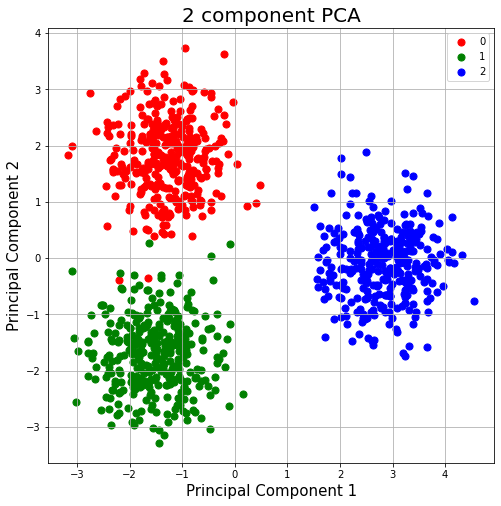

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.plot()


# classification

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xtrain)
# Apply transform to both the training set and the test set.
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [55]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
logisticRegr.score(xtest,ytest)

0.99

In [69]:
r=logisticRegr.predict(xtest)
r

array([1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1,
       0, 0])

In [66]:
ytest

array([1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1,
       0, 0])

In [76]:
import numpy as np
ytest = np.asarray(ytest)
misclassified = np.where(ytest != logisticRegr.predict(xtest))
misclassified#means , here 101th index and 157th index is misclassified

(array([101, 157]),)

In [75]:
print(r[101])#predicted result 
print(ytest[101])#actual result
#misclassfied 1
print(r[157])#predicted result 
print(ytest[157])#actual result
#misclassfied 2

1
0
1
0
